### Bartholomew_Luke_DA301_Assignment_Notebook <a id='top'></a>

## Predicting Future Outcomes

Welcome to my Jupyter Notebook. The following sections should be completed in order:

1. <a class="anchor" href='#1'>Files Required</a>
2. <a class="anchor" href='#2'>Library Dependencies</a>
3. <a class="anchor" href='#3'>Import & Describe The Data</a>
4. <a class="anchor" href='#4'>Data Wrangling</a>
5. <a class="anchor" href='#5'>Making Predictions with Regression</a>
6. <a class="anchor" href='#6'>Making Predictions with Clustering</a>
7. <a class="anchor" href='#7'>Analysing Customer Sentiments with Reviews</a>
10. <a class="anchor" href='#10'>Recommendations</a>

<table width="100%">
<thead>
    <tr style="background-color:#D6EEEE">
        <th><h2 style="text-align:left">1. Files Required</h2></th>
        <th><a id="1"></a></th>
    </tr>
</thead>
</table>

This notebook requires the `turtle_reviews.csv`, `turtle_sales.csv` and `metadata_turtle_games.txt` files. Upload these files to the directory before you begin.

The files, this Jupyter notebook and technical report can be accessed at the [GitHub repository][id2].

[id2]:https://github.com/lukebart/Bartholomew_Luke_DA301_Assignment

<table width="100%">
<thead>
    <tr style="background-color:#D6EEEE">
        <th><h2 style="text-align:left">2. Library Dependencies</h2></th>
        <th><a id="2"></a></th>
    </tr>
</thead>
</table>

The following libraries will need to be installed for this notebook to work:
- [Numpy][id3]
- [Pandas][id4]
- [Datetime][id5]
- [Matplotlib][id6]
- [Seaborn][id7]
- [Jupyter Notebook][id8]
- [Dotenv][id9]
- [Scikit-learn][id10]
- [Yellowbrick][id11]

[id3]:https://anaconda.org/conda-forge/numpy
[id4]:https://anaconda.org/conda-forge/pandas
[id5]:https://anaconda.org/trentonoliphant/datetime
[id6]:https://anaconda.org/conda-forge/matplotlib
[id7]:https://anaconda.org/conda-forge/seaborn
[id8]:https://anaconda.org/conda-forge/notebook
[id9]:https://anaconda.org/conda-forge/python-dotenv
[id10]:https://anaconda.org/conda-forge/scikit-learn
[id11]:https://anaconda.org/conda-forge/yellowbrick


### Import Libraries

<div class="alert alert-block alert-danger">
<b>Important:</b> Run the code below before going further.
</div>

In [20]:
# Import basic data analysis libraries
import numpy as np
import pandas as pd

# Import charting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import stats models
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import qqplot

# Import sklearn and yellowbrick
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

# Import libraries os and dotenv to read .env file
import os
from dotenv import load_dotenv

<table width="100%">
<thead>
    <tr style="background-color:#D6EEEE">
        <th><h2 style="text-align:left">3. Import &amp Describe The Data</h2></th>
        <th><a id="3"></a></th>
    </tr>
</thead>
</table>

Sense-check the <b>raw data</b> from the imported from the files using Pandas DataFrames. Determine (a) column names, number of rows and columns, data types and number of missing values, and (b) descriptive statistics and metadata of each DataFrame.

### (i) Import Data From .csv Files

In [89]:
# Load the .csv files as turtle_sales & turtle_reviews
turtle_sales = pd.read_csv('turtle_sales.csv')
turtle_reviews = pd.read_csv('turtle_reviews.csv')

### Functions

<b>NOTE:</b> In order to avoid repetition, I wrote a function used to describe the imported data.

In [22]:
# Function to describe data in the dataframe (mini version)
# df = DataFrame object (dataframe)
# df_sum = Column to sum (string)
def describe_data_mini(df, df_sum):
    # Check shape of dataframe
    print("Shape of DataFrame:")
    print(df.shape)
    
    # missing values
    df_na = df.isna().sum()
    print("Missing values in DataFrame:")
    print(df_na)
    
    # Check info of dataframe
    print("Info of DataFrame:")
    print(df.info())
    
    # return head of dataframe
    print("Head of DataFrame:")
    return df.head(5).style.bar(subset=[df_sum], color='#CCCCCC')

In [25]:
# Function to describe data in the dataframe
# df = DataFrame object (dataframe)
# df_name = Name of the file the DataFrame object created from (string)
# df_columns = List of columns to describe unique values (list)
# df_sum = Column to sum (string)
# df_head = Show number of rows (integer)
def describe_data(df, df_name, df_columns, df_sum, df_head):
    print(f"Shape of DataFrame {df_name}:")
    print(df.shape)
    print('\n')
    print(f"Info of DataFrame {df_name}:")
    print(df.info())
    print('\n')
    print(f"Describe DataFrame {df_name}:")
    print(df.describe())
    print('\n')
    # Determine the number of missing values
    df_na = df.isna().sum()
    print(f"Missing values in DataFrame {df_name}:")
    print(df_na)
    print('\n')
    # Check for duplicates
    df_duplicates = df[df.duplicated()]
    print(f"Duplicates in DataFrame {df_name}:")
    print(df_duplicates)
    print('\n')
    # loop df_columns
    for col_name in df_columns:
        # Show unique values by col_name
        print(f"Unique count for {col_name} of DataFrame {df_name}: ")
        print(df[col_name].unique())
        print(df[col_name].nunique())
        print('\n')
        # Show sum of column df_sum by col_name
        print(f"Sum {df_sum} by {col_name} of DataFrame {df_name} (top {df_head}): ")
        print(df.groupby(col_name).aggregate({df_sum : 'sum'}).
              sort_values(by=[df_sum], ascending=False).head(df_head))
        print('\n')
    print(f"Head of DataFrame {df_name}:")
    return df.head(5).style.bar(subset=[df_sum], color='#CCCCCC')

### (ii) Describe turtle_sales

In [15]:
# show head for turtle_sales
turtle_sales.head(5)

,Ranking,Product,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,Global_Sales
0,1,107,Wii,2006.0,Sports,Nintendo,34.02,23.80,67.85
1,2,123,NES,1985.0,Platform,Nintendo,23.85,2.94,33.00
2,3,195,Wii,2008.0,Racing,Nintendo,13.00,10.56,29.37
3,4,231,Wii,2009.0,Sports,Nintendo,12.92,9.03,27.06
4,5,249,GB,1996.0,Role-Playing,Nintendo,9.24,7.29,25.72


In [35]:
# Call function to describe data in turtle_sales.csv
describe_data(turtle_sales,'turtle_sales.csv',['Platform',
                                               'Genre',
                                               'Publisher'],
                                               'Global_Sales',10)

Shape of DataFrame turtle_sales.csv:
(352, 9)


Info of DataFrame turtle_sales.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ranking       352 non-null    int64  
 1   Product       352 non-null    int64  
 2   Platform      352 non-null    object 
 3   Year          350 non-null    float64
 4   Genre         352 non-null    object 
 5   Publisher     352 non-null    object 
 6   NA_Sales      352 non-null    float64
 7   EU_Sales      352 non-null    float64
 8   Global_Sales  352 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 24.9+ KB
None


Describe DataFrame turtle_sales.csv:
            Ranking      Product         Year    NA_Sales    EU_Sales  \
count    352.000000   352.000000   350.000000  352.000000  352.000000   
mean    1428.017045  3607.227273  2006.985714    2.515966    1.643778   
std     2743.

,Ranking,Product,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,Global_Sales
0,1,107,Wii,2006.000000,Sports,Nintendo,34.020000,23.800000,67.850000
1,2,123,NES,1985.000000,Platform,Nintendo,23.850000,2.940000,33.000000
2,3,195,Wii,2008.000000,Racing,Nintendo,13.000000,10.560000,29.370000
3,4,231,Wii,2009.000000,Sports,Nintendo,12.920000,9.030000,27.060000
4,5,249,GB,1996.000000,Role-Playing,Nintendo,9.240000,7.290000,25.720000


In [38]:
# unique values in Ranking column
turtle_sales['Ranking'].nunique()

352

In [39]:
# unique values in Product column
turtle_sales['Product'].nunique()

175

### Description of dataset turtle_sales.csv

- shape confirms the total rows to be 352 and 9 columns.
- info() shows Year column has float64 datatype, this will need to be changed to int64.
- describe() shows Year range is from 1982 to 2016 with average 2007, Global_Sales range from 0.01 (millions) to 67.85 (millions) with average 5.33 (millions).
- isna() and info() shows 2 missing values in the Year column.
- No duplcate rows found.
- Unique count of Platform shows 22 categories, and sum of Global_Sales by Platform shows Wii to be the best selling category.
- Unique count of Genre shows 12 categories, and sum of Global_Sales by Genre shows Shooter to be the best selling category.
- Unique count of Publisher shows 24 categories, and sum of Global_Sales by Publisher shows Nintendo to be the best selling category.
- Ranking is unique to each row (352 unique values).
- Product has duplicates (175 unique values).

<b>Data Wrangling To-Do List:</b>
<ol type="1">
    <li>Change column names to lower case.</li>
    <li>Find and remove/edit missing values in Year column.</li>
    <li>Change Year column to datatype int64.</li>
    <li>Update Product column name to be product_id.</li>
</ol>

### (ii) Describe turtle_reviews

In [19]:
# show head for turtle_reviews
turtle_reviews.head(5)

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [44]:
# Call function to describe data in turtle_reviews.csv
describe_data(turtle_reviews,'turtle_reviews.csv',['gender',
                                                   'age',
                                                   'education',
                                                   'language',
                                                   'platform'],
                                                   'loyalty_points',10)

Shape of DataFrame turtle_reviews.csv:
(2000, 11)


Info of DataFrame turtle_reviews.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB
None


Describe DataFrame turtle_reviews.csv:
    

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.300000,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on the screen itself is at an absolute premium. The fact that 50% of this space is wasted on art (and not terribly informative or needed art as well) makes it completely useless. The only reason that I gave it 2 stars and not 1 was that, technically speaking, it can at least still stand up to block your notes and dice rolls. Other than that, it drops the ball completely.",The fact that 50% of this space is wasted on art (and not terribly informative or needed art ...
1,Male,23,12.300000,81,524,graduate,EN,Web,466,"An Open Letter to GaleForce9*: Your unpainted miniatures are very not bad. Your spell cards are great. Your board games are ""meh"". Your DM screens, however, are freaking terrible. I'm still waiting for a single screen that isn't polluted with pointless artwork where useful, reference-able tables should be. Once again, you've created a single use screen that is only useful when running the ""Storm King's Thunder"" adventure. Even despite the fact that it's geared to that adventure path, it's usefulness negligible, at best. I massive swath of the inner panel is wasted on artwork and a bloated overland map, which could have been easily reduced to a single panel in size. And the few table you have are nigh-useless themselves. In short, stop making crap DM screens.",Another worthless Dungeon Master's screen from GaleForce9
2,Female,22,13.120000,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are filled with a general Forgotten Realms map is beyond me. Most of one of them is all blue ocean. Such a waste. I don't understand why they can't make these DM Screens more useful for these ""kinds of adventures"" rather than solely the specific adventure. You're supposed to be able to transpose this adventure to other lands outside the Forgotten Realms. So even just a list of new monsters or NPCs would at least be useful than the map. Even more would just be stuff related to running the game but broad-use stuff related to giants. Same thing with Curse of Strahd. Why not make it useful for raven loft, undead or horror campaigns in general... instead a huge amount of screen space is solely mapping out Castle Ravenloft, which is only useful during a small fraction of the time even for the Curse of Strahd adventure, let alone various other Ravenloft adventuring. They really kill the extended use of these screens by not thinking about their potential use, both for the adventure in question, as well as use in a broader sense. The Rage of Demons screen is far more useful for broad under dark adventuring - covering a lot of rules for the various conditions you may suffer... and the map is only one panel. This Storm Giants one is decent for a few tables it includes - but really misses the mark. Maybe they should ask a few DMs what they would use?","pretty, but also pretty useless"
3,Female,25,13.120000,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new dm and it's perfect!,Five Stars
4,Female,33,13.940000,40,366,graduate,EN,Web,291,"As my review of GF9's previous screens these were completely unnecessary and nearly useless. Skip them, this is the definition of a waste of money.",Money trap


In [42]:
# unique values in Product column
turtle_reviews['product'].nunique()

200

### Description of dataset turtle_reviews.csv

- shape confirms the total rows to be 2000 and 11 columns.
- info() shows all columns are the corrent datatypes.
- describe() shows age range is from 17 to 72 with average 39.45, remuneration range from 12.30 (thousands) to 112.34 (thousands) with average 48.08, spending_score range 1 to 99 with average 50, loyalty_points range from 25 to 6847 with average 1578.03.
- isna() and info() shows no missing values.
- No duplcate rows found.
- Unique count of gender shows 2 categories (Male & Female), and the sum of loyalty_points by gender shows Female with the most loyalty_points.
- Unique count of education shows 5 categories and the sum of loyalty_points by education shows graduate to have the most loyalty_points.
- Unique count of language shows a single category (EN).
- Unique count of platform shows a single category (Web).
- Product has duplicates (200 unique values).
- No unique index in the dataset (e.g. customer_id).

<b>Data Wrangling To-Do List:</b>
<ol type="1">
    <li>Change column names remuneration (k£) and spending_score (1-100) to remuneration and spending_score.</li>
    <li>Multiply remuneration column by 1000 to calculate correct amount in thousands of pounds.</li>
    <li>Update values in the education column to be capitalised, which will help with visualisation.</li>
    <li>Remove language column as it has no value to the analysis.</li>
    <li>Remove platform column as it has no value to the analysis.</li>
    <li>Update product column name to be product_id.</li>
</ol>

<table width="100%">
<thead>
    <tr style="background-color:#D6EEEE">
        <th><h2 style="text-align:left">4. Data Wrangling</h2></th>
        <th><a id="4"></a><a class="anchor" href='#top'>Back to Top</a></th>
    </tr>
</thead>
</table>

### (i) Manipulation of the turtle_sales dataset

<b>Reminder: Data Wrangling To-Do List:</b>
<ol type="1">
    <li>Change column names to lower case.</li>
    <li>Find and remove/edit missing values in Year column.</li>
    <li>Change Year column to datatype int64.</li>
    <li>Update Product column name to be product_id.</li>
</ol>

#### 1. Change column names to lower case

Making all column names lower case will make it easier when coding.

In [51]:
turtle_sales.columns = turtle_sales.columns.str.lower()

In [52]:
turtle_sales.head()

,ranking,product,platform,year,genre,publisher,na_sales,eu_sales,global_sales
0,1,107,Wii,2006.0,Sports,Nintendo,34.02,23.80,67.85
1,2,123,NES,1985.0,Platform,Nintendo,23.85,2.94,33.00
2,3,195,Wii,2008.0,Racing,Nintendo,13.00,10.56,29.37
3,4,231,Wii,2009.0,Sports,Nintendo,12.92,9.03,27.06
4,5,249,GB,1996.0,Role-Playing,Nintendo,9.24,7.29,25.72


#### 2. Find and remove/edit missing values in Year column

In [54]:
# creating boolean series True for NaN values
boolean_series = pd.isnull(turtle_sales["year"])

# displaying data only with year = NaN
turtle_sales[boolean_series]

,ranking,product,platform,year,genre,publisher,na_sales,eu_sales,global_sales
179,180,7141,PS2,NaN,Sports,Electronic Arts,3.49,0.21,4.29
257,1128,948,PC,NaN,Shooter,Activision,0.48,0.66,1.34


> As expected, we have 2 rows with year = NaN, rather than remove the data we can fill these rows will year = average or 2007 (as discovered earlier).

In [55]:
# fill all missing values with value 2007
turtle_sales = turtle_sales.fillna(2007)

In [58]:
# check missing values
df_na = turtle_sales.isna().sum()

# show head
df_na.head()

ranking     0
product     0
platform    0
year        0
genre       0
dtype: int64

In [64]:
# check rows that previously contained missing values
turtle_sales[(turtle_sales['ranking'] == 180) | (turtle_sales['ranking'] == 1128)].head()

,ranking,product,platform,year,genre,publisher,na_sales,eu_sales,global_sales
179,180,7141,PS2,2007.0,Sports,Electronic Arts,3.49,0.21,4.29
257,1128,948,PC,2007.0,Shooter,Activision,0.48,0.66,1.34


> Rows were updated successfully to be the mean value of 2007.

#### 3. Change Year column to datatype int64

In [66]:
# update datatype for year from float64 to int64
turtle_sales['year'] = turtle_sales['year'].astype(np.int64)

In [67]:
# check the turtle_sales info
turtle_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352 entries, 0 to 351
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ranking       352 non-null    int64  
 1   product       352 non-null    int64  
 2   platform      352 non-null    object 
 3   year          352 non-null    int64  
 4   genre         352 non-null    object 
 5   publisher     352 non-null    object 
 6   na_sales      352 non-null    float64
 7   eu_sales      352 non-null    float64
 8   global_sales  352 non-null    float64
dtypes: float64(3), int64(3), object(3)
memory usage: 24.9+ KB


In [68]:
# check the turtle_sales head
turtle_sales.head()

,ranking,product,platform,year,genre,publisher,na_sales,eu_sales,global_sales
0,1,107,Wii,2006,Sports,Nintendo,34.02,23.80,67.85
1,2,123,NES,1985,Platform,Nintendo,23.85,2.94,33.00
2,3,195,Wii,2008,Racing,Nintendo,13.00,10.56,29.37
3,4,231,Wii,2009,Sports,Nintendo,12.92,9.03,27.06
4,5,249,GB,1996,Role-Playing,Nintendo,9.24,7.29,25.72


> Updated datatype for year column correctly.

#### 4. Update Product column name to be product_id

In [69]:
# Rename the column product to be product_id
turtle_sales.rename(columns = {'product':'product_id'}, inplace = True)

In [70]:
# check the head
turtle_sales.head()

,ranking,product_id,platform,year,genre,publisher,na_sales,eu_sales,global_sales
0,1,107,Wii,2006,Sports,Nintendo,34.02,23.80,67.85
1,2,123,NES,1985,Platform,Nintendo,23.85,2.94,33.00
2,3,195,Wii,2008,Racing,Nintendo,13.00,10.56,29.37
3,4,231,Wii,2009,Sports,Nintendo,12.92,9.03,27.06
4,5,249,GB,1996,Role-Playing,Nintendo,9.24,7.29,25.72


#### 5. Export the updated dataset to a .csv file

In [71]:
# export turtle_sales dataframe to ts.csv file
turtle_sales.to_csv('ts.csv', index=False)

### (ii) Manipulation of the turtle_reviews dataset

<b>Reminder: Data Wrangling To-Do List:</b>
<ol type="1">
    <li>Change column names remuneration (k£) and spending_score (1-100) to remuneration and spending_score.</li>
    <li>Multiply remuneration column by 1000 to calculate correct amount in thousands of pounds.</li>
    <li>Update values in the education column to be capitalised, which will help with visualisation.</li>
    <li>Remove language column as it has no value to the analysis.</li>
    <li>Remove platform column as it has no value to the analysis.</li>
    <li>Update product column name to be product_id.</li>
</ol>

#### 1. Change column names remuneration (k£) and spending_score (1-100) to remuneration and spending_score

In [90]:
# Rename the column headers
turtle_reviews.rename(columns = {'remuneration (k£)':'remuneration', 
                                 'spending_score (1-100)':'spending_score'}, inplace = True)

In [91]:
# check the info
turtle_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   language        2000 non-null   object 
 7   platform        2000 non-null   object 
 8   product         2000 non-null   int64  
 9   review          2000 non-null   object 
 10  summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


#### 2. Multiply remuneration column by 1000 to calculate correct amount in thousands of pounds

In [92]:
# change remuneration to actual amount in thousands of pounds
turtle_reviews['remuneration'] = turtle_reviews['remuneration']*1000

In [93]:
# change remueration from float64 to int64 (remove decimal places)
turtle_reviews['remuneration'] = turtle_reviews['remuneration'].astype(np.int64)

In [94]:
# check the head
turtle_reviews.head()

,gender,age,remuneration,spending_score,loyalty_points,education,language,platform,product,review,summary
0,Male,18,12300,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12300,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13120,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13120,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13940,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


#### 3. Update values in the education column to be capitalised, which will help with visualisation

In [95]:
# Show the different categories for education
turtle_reviews['education'].value_counts()

graduate        900
PhD             460
postgraduate    400
diploma         190
Basic            50
Name: education, dtype: int64

In [96]:
# Dictionary mapping education with new value
education_values = {'graduate' : 'Graduate',
                    'PhD' : 'PhD',
                    'postgraduate' : 'Post-Graduate',
                    'diploma' : 'Diploma',
                    'Basic' : 'Basic'}

In [97]:
# Create new season column from dictionary mapping
turtle_reviews['education'] = turtle_reviews['education'].map(education_values)

In [98]:
# Show the different categories for education
turtle_reviews['education'].value_counts()

Graduate         900
PhD              460
Post-Graduate    400
Diploma          190
Basic             50
Name: education, dtype: int64

#### 4. Remove language and platform columns as these have no value to the analysis

In [99]:
# Drop language and platform columns
turtle_reviews = turtle_reviews.drop(['language', 'platform'], axis=1)

In [100]:
# check the info
turtle_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          2000 non-null   object
 1   age             2000 non-null   int64 
 2   remuneration    2000 non-null   int64 
 3   spending_score  2000 non-null   int64 
 4   loyalty_points  2000 non-null   int64 
 5   education       2000 non-null   object
 6   product         2000 non-null   int64 
 7   review          2000 non-null   object
 8   summary         2000 non-null   object
dtypes: int64(5), object(4)
memory usage: 140.8+ KB


#### 5. Update product column name to be product_id

In [101]:
# Rename the column product to be product_id
turtle_reviews.rename(columns = {'product':'product_id'}, inplace = True)

In [102]:
# check the head
turtle_reviews.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product_id,review,summary
0,Male,18,12300,39,210,Graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12300,81,524,Graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13120,6,40,Graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13120,77,562,Graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13940,40,366,Graduate,291,As my review of GF9's previous screens these w...,Money trap


#### 6. Export the updated dataset to a .csv file

In [103]:
# export turtle_sales dataframe to tr.csv file
turtle_reviews.to_csv('tr.csv', index=False)

<table width="100%">
<thead>
    <tr style="background-color:#D6EEEE">
        <th style="width:85%"><h2 style="text-align:left">5. Making Predictions with Regression</h2></th>
        <th><a id="5"></a><a class="anchor" href='#top'>Back to Top</a></th>
    </tr>
</thead>
</table>

### Function

This function is used to standardise a dataset so that the numerical values are between 0 and 1.

In [10]:
# Apply the maximum absolute scaling in Pandas using the .abs() and .max() methods.
def max_abs_scaling(df):
    # Copy the DataFrame.
    df_scaled = df.copy()
    if isinstance(df_scaled, pd.DataFrame):
        # Apply maximum absolute scaling.
        for column in df_scaled.columns:
            df_scaled[column] = df_scaled[column] / df_scaled[column].abs(
            ).max()
    else:
        df_scaled = df_scaled / df_scaled.abs().max()
        
    return df_scaled

### Import Data

In [3]:
# import tr.csv dataset
tr = pd.read_csv('tr.csv')

In [4]:
# check the head
tr.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product_id,review,summary
0,Male,18,12300,39,210,Graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12300,81,524,Graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13120,6,40,Graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13120,77,562,Graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13940,40,366,Graduate,291,As my review of GF9's previous screens these w...,Money trap


We are going to use age, remuneration and spending_score to predict the value of loyalty_points.

In [9]:
# we are interested on how age, remuneration and spending_score impact on loyalty_points
# Drop unnecessary columns
tr_subset = tr.drop(['gender', 'education', 'product_id', 'review', 'summary'], axis=1)

In [324]:
# check the head
tr_subset.head()

,age,remuneration,spending_score,loyalty_points
0,18,12300,39,210
1,23,12300,81,524
2,22,13120,6,40
3,25,13120,77,562
4,33,13940,40,366


In [325]:
# check the info
tr_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             2000 non-null   int64
 1   remuneration    2000 non-null   int64
 2   spending_score  2000 non-null   int64
 3   loyalty_points  2000 non-null   int64
dtypes: int64(4)
memory usage: 62.6 KB


### Visualise the Data: Pairplots

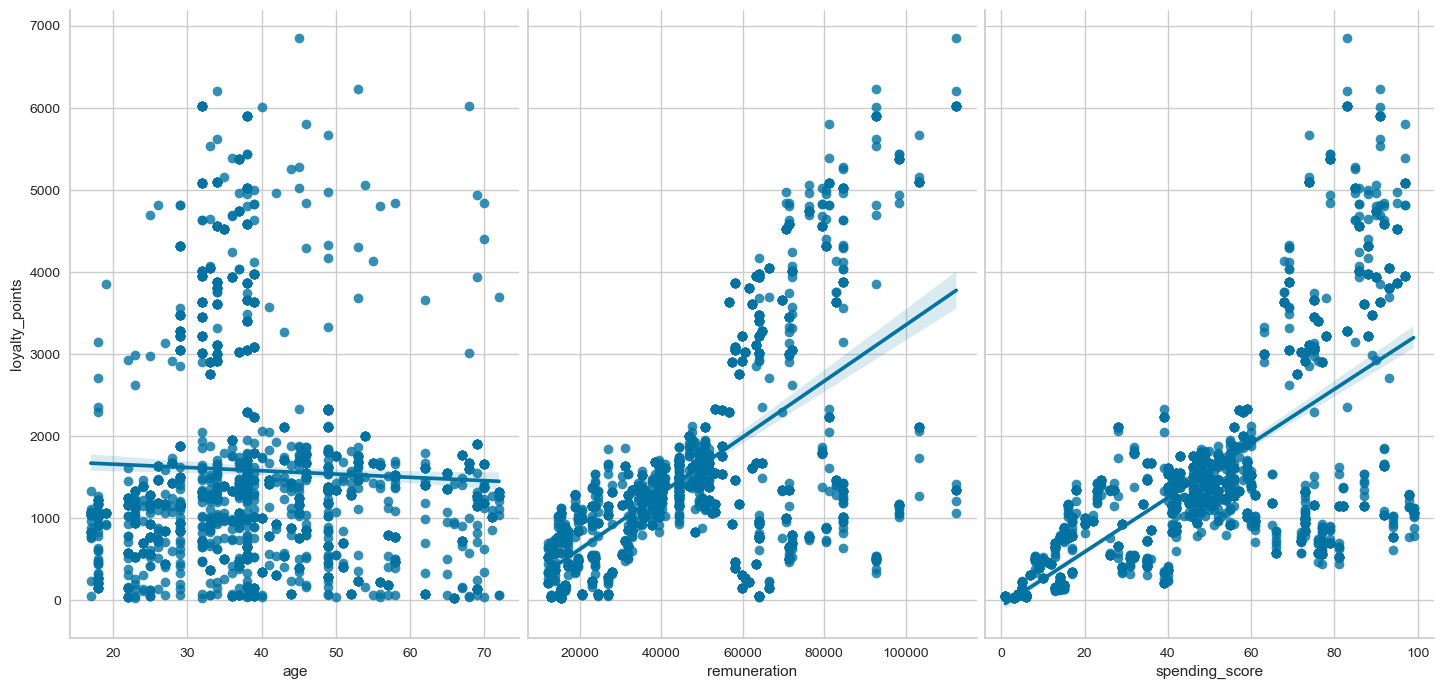

In [229]:
# visualise a pairplot with the age, remuneration and spending_score by loyalty_points
sns.pairplot(tr_subset, x_vars=['age', 'remuneration', 'spending_score'], \
             y_vars='loyalty_points', height=7, aspect=0.7, kind='reg')

# show the plot
plt.show()

In [155]:
# calculate correlations
tr_subset.corr()

,age,remuneration,spending_score,loyalty_points
age,1.000000,-0.005708,-0.224334,-0.042445
remuneration,-0.005708,1.000000,0.005612,0.616065
spending_score,-0.224334,0.005612,1.000000,0.672310
loyalty_points,-0.042445,0.616065,0.672310,1.000000


The charts and correlation numbers above illustrates the relationship between loyalty_points (1 column) and age, remuneration and spending_score (3 columns). Based on this we can say the following:
- age has a very low negative correlation with loyalty_points (-0.042).
- remuneration has a strong positive correlation with loyalty_points (0.616).
- spending_score has a strong positive correlation with loyalty_points (0.672).

Later on we will investigate the strength and predictive power of these correlations.

### Visualise the Data: Boxplots

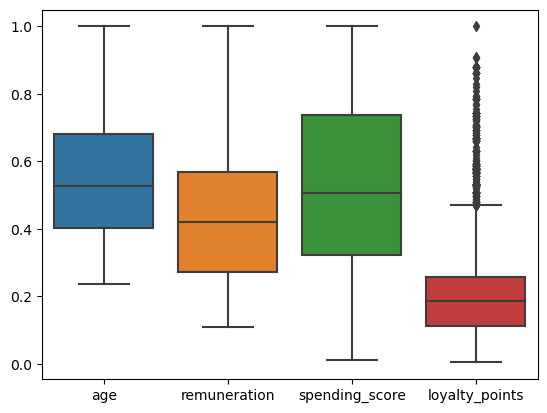

In [133]:
# visualise a boxplot for each column in dataset
# scale the data between 0 and 1
sns.boxplot(max_abs_scaling(tr_subset))

# show the plot
plt.show()

The boxplots above shows:
- remuneration has extreme higher values.
- spending_score looks evenly distributed with not too many extreme values.
- loyalty_points have extreme high values outside the interquartile range (outliers).

### Visualise the Data: Histograms

Histograms will show us the distribution of the data within each column.

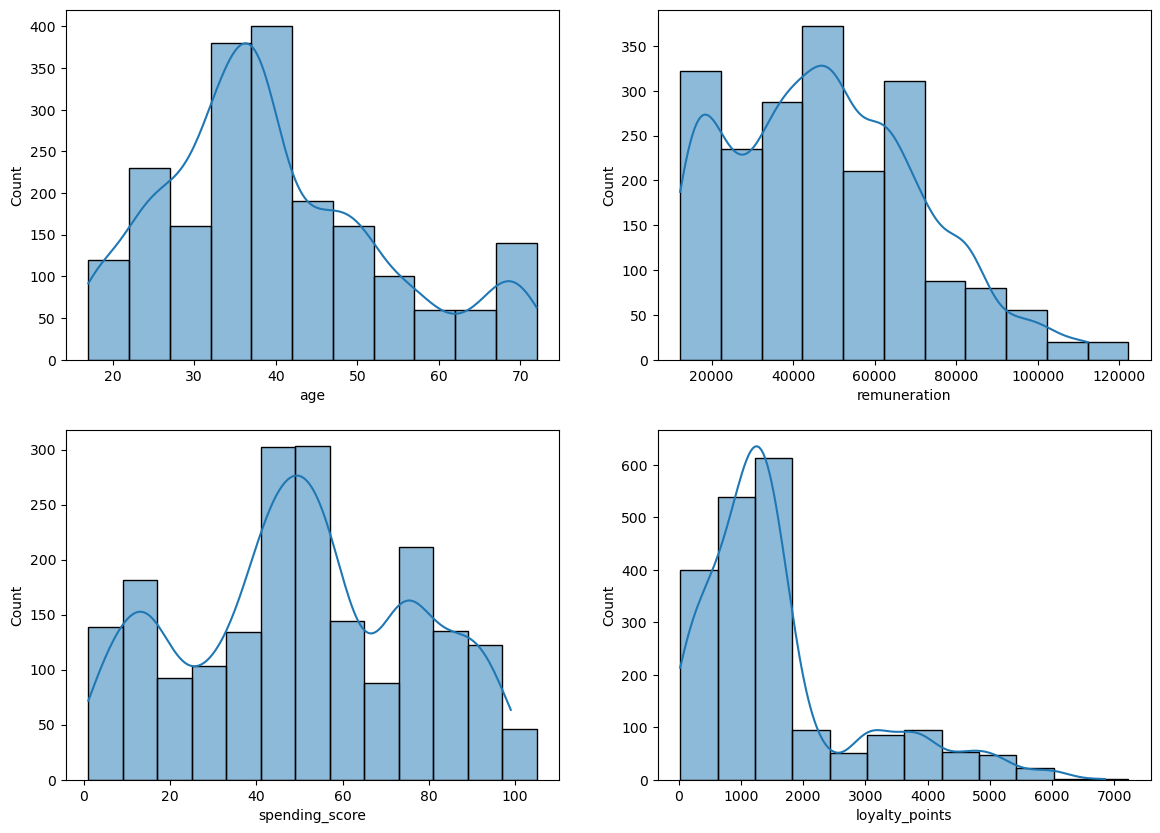

In [160]:
# visualise a histogram for each column in dataset
# setup the figure 2 x 2
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# create the histograms
sns.histplot(data=tr_subset, x="age", kde=True, ax=axs[0, 0], binwidth=5)
sns.histplot(data=tr_subset, x="remuneration", kde=True, ax=axs[0, 1], binwidth=10000)
sns.histplot(data=tr_subset, x="spending_score", kde=True, ax=axs[1, 0], binwidth=8)
sns.histplot(data=tr_subset, x="loyalty_points", kde=True, ax=axs[1, 1], binwidth=600)

# show the plot
plt.show()

The histograms above show:
- age is right skewed to the lower end, but with a spike of values above 70.
- remuneration is right skewed to the lower end below 70000 with uneven distribution.
- spending_score is multimodal with 3 distinct peaks.
- loyalty_points is right skewed to the lower end below 2000.

### (i) Linear Regression: spending_score vs loyalty_points

A reminder of the metadata descriptions for <b>spending_score</b> and <b>loyalty_points</b>:
- spending_score = A score is assigned to the customer by Turtle Games based on the customer’s spending nature and behaviour. The value ranges between 1 and 100.
- loyalty_points = A score based on the point value of the purchase, converting the monetary value to point value, and the point value of an action (purchase).

><b>IMPORTANT NOTE:</b> As both spending_score and loyalty_points are based on customer spend we should expect there to be a positive relationship between the two variables.

<Axes: xlabel='spending_score', ylabel='Count'>

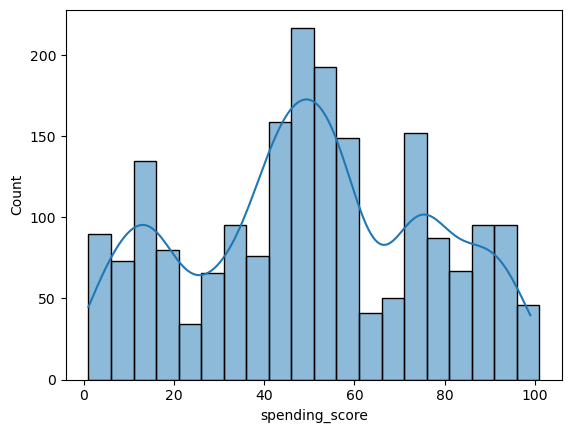

In [240]:
# Histogram of Spending Score
# check the distribution
sns.histplot(data=tr_subset, x="spending_score", kde=True, binwidth=5)

### Set the dependent and independent variables and create the model

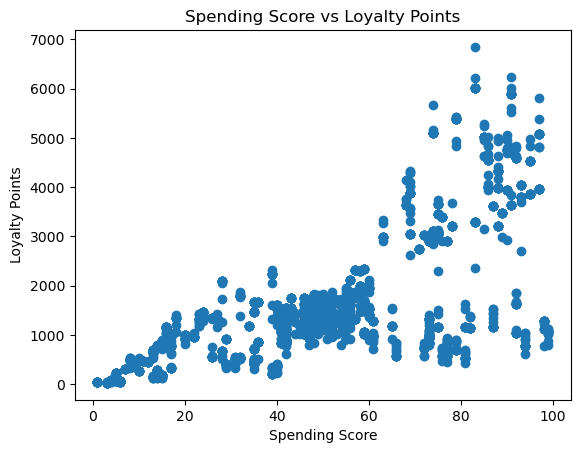

In [186]:
# Dependent variable
y = tr_subset["loyalty_points"]

# Independent variable
X = tr_subset["spending_score"]

# Check for linearity
plt.scatter(X,y)

# Set the title and legends for the graph.  
plt.title("Spending Score vs Loyalty Points")
plt.xlabel("Spending Score")
plt.ylabel("Loyalty Points") 

# show the scatterplot
plt.show()

In [187]:
# OLS model and summary
# Run the OLS test
f = 'y ~ X'
test = ols(f, data=tr_subset).fit()

# View the regression table
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Mon, 03 Jul 2023   Prob (F-statistic):          2.92e-263
Time:                        17:12:01   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
X             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> The summary indicates:
> - $R^2$: 45.20% of the total variability of `y` (how many loyalty_points the customer has collected), is explained by the variability of `X` (the customer spending_score).
> - `X`: The coefficient of `X` describes the slope of the regression line, in other words, how much the response variable `y` change when `X` changes by 1 point. In this model, if the customer spending_score (`X`) changes by 1 point, then the loyalty_points collected by the customer (`y`) will change by 33.06 points. 
>  - The `P>[t]` for the `X` coefficient value tests the hypothesis that the slope is significant or not. If the corresponding probability is small (typically smaller than 0.05) the slope is significant. In this case, the probability of the t-value is zero, thus the estimated slope is significant. 
>   - The last two numbers describe the 95% confidence interval of the true `X` coefficient, i.e. the true slope. For instance, if you take a different sample, the estimated slope will be slightly different. If you take 100 random samples each of 500 observations of `X` and `y`, then 95 out of the 100 samples will derive a slope that is within the interval (31.464 , 34.659).

### Create the predicted y-values (loyalty_points) and plot the line of best fit

In [124]:
# Extract the estimated parameters
print("Parameters: ", test.params)

# Extract the standard errors
print("Standard errors: ", test.bse)  

# Extract the predicted values
print("Predicted values: ", test.predict()) 

Parameters:  Intercept   -75.052663
X            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
X             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [207]:
# Create the linear regression model
# x coef = 33.061693
# Constant coef = -75.052663
# Create the linear equation
y_pred =  (-75.052663) + 33.061693 * X # X = spending_score

# View the output
y_pred

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spending_score, Length: 2000, dtype: float64

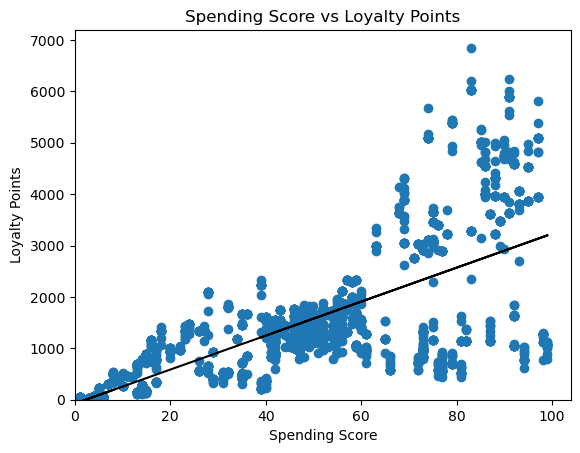

In [200]:
# Plot the data points with a scatterplot
plt.scatter(X, y)

# Plot the regression line (in black)
plt.plot(X, y_pred, color='black')

# Set the x and y limits on the axes
plt.xlim(0)
plt.ylim(0)

# Set the title and legends for the graph
plt.title("Spending Score vs Loyalty Points")
plt.xlabel("Spending Score")
plt.ylabel("Loyalty Points") 

# View the plot
plt.show()

### Check the Residuals

This shows how far the true value of y is from the predicted value of y.

In [208]:
# Residuals are calculated
# residuals = (y-predict - y-observe)
residuals = y_pred - y

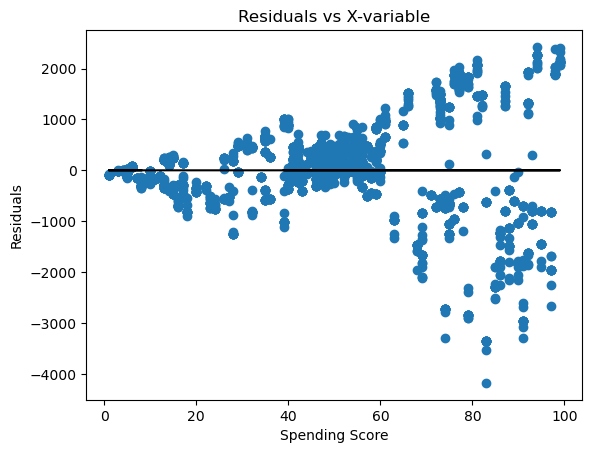

In [204]:
# Plot the residuals versus the x-values
# Ideally, there should be no pattern in this plot
plt.scatter(X, residuals)
plt.plot(X, y - y, color='black')
plt.title("Residuals vs X-variable")
plt.xlabel("Spending Score")
plt.ylabel("Residuals")
plt.show()

This shows that when the spending_score is greater than 60, the predicted values for loyalty_points are further away from actual values of loyalty_points.

<b>Note:</b> We like the residuals to be close the 0 line i.e. the predicted value is not too far away from the actual value.

### Check the Q-Q Plot

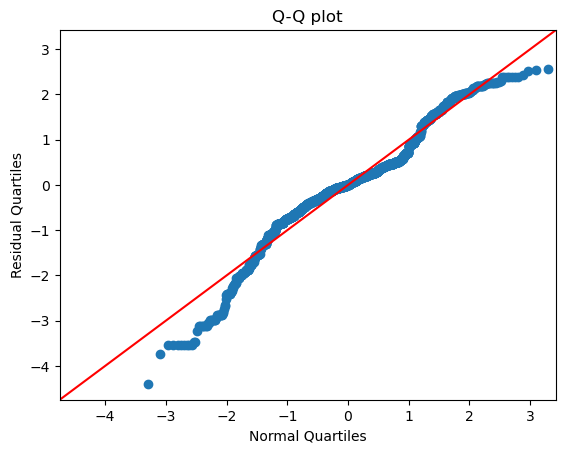

In [206]:
# Plot the quartiles of the residuals versus the quartiles of the N(0,1)
# The fit=True argument first Standardises the observed data (Residuals) before plotting them
sm.qqplot(residuals, fit=True, line='45')
plt.ylabel("Residual Quartiles")
plt.xlabel("Normal Quartiles")
plt.title("Q-Q plot")
plt.show()

### As an experiment, remove customers with spending_scores greater than 60 and run the OLS test

In [235]:
tr_spending_score_lte60 = tr_subset.loc[tr_subset['spending_score'] <= 60]

In [236]:
# Dependent variable
y = tr_spending_score_lte60["loyalty_points"]

# Independent variable
X = tr_spending_score_lte60["spending_score"]

# OLS model and summary
# Run the OLS test
f = 'y ~ X'
test = ols(f, data=tr_spending_score_lte60).fit()

# View the regression table
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     2055.
Date:                Mon, 03 Jul 2023   Prob (F-statistic):          1.74e-274
Time:                        18:07:54   Log-Likelihood:                -10015.
No. Observations:                1367   AIC:                         2.003e+04
Df Residuals:                    1365   BIC:                         2.005e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    157.8290     22.483      7.020      0.000     113.725     201.933
X             25.5150      0.563     45.327      0.000      24.411      26.619
==============================================================================
Omnibus:                       29.904   Durbin-Watson:                   0.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.134
Skew:                           0.335   Prob(JB):                     1.05e-07
Kurtosis:                       3.340   Cond. No.                         90.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> As expected, the model performs better with an $R^2$ value of 60.01% and an `X` coefficient of 25.52. We can conclude where the customer spending_score is less than or equal to 60 it will explain 60.01% of the variance in loyalty_points, and that 1 spending_score point will equal to 25.52 loyalty_points. The model will be less useful when the customer spending_score is above 60, the loyalty_points will have a higher variance and be less predictable using this metric.

In [223]:
# subset the data where spending_score > 60
tr_spending_score_gt60 = tr_subset.loc[tr_subset['spending_score'] > 60]

In [224]:
# Dependent variable
y = tr_spending_score_gt60["loyalty_points"]

# Independent variable
X = tr_spending_score_gt60["spending_score"]

# OLS model and summary
# Run the OLS test
f = 'y ~ X'
test = ols(f, data=tr_spending_score_gt60).fit()

# View the regression table
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     58.35
Date:                Mon, 03 Jul 2023   Prob (F-statistic):           8.15e-14
Time:                        18:05:51   Log-Likelihood:                -5559.3
No. Observations:                 633   AIC:                         1.112e+04
Df Residuals:                     631   BIC:                         1.113e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1171.9856    507.081     -2.311      0.021   -2167.756    -176.215
X             47.6652      6.240      7.639      0.000      35.412      59.918
==============================================================================
Omnibus:                      276.221   Durbin-Watson:                   0.384
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.605
Skew:                           0.073   Prob(JB):                     3.06e-08
Kurtosis:                       1.864   Cond. No.                         656.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### (ii) Linear Regression: remuneration vs loyalty_points

A reminder of the metadata description for <b>remuneration</b> and <b>loyalty_points</b>:
- remuneration = Total income per customer per year in pounds, where k=1000.(I have multiplied by 1000 to give the correct value).
- loyalty_points = A score based on the point value of the purchase, converting the monetary value to point value, and the point value of an action (purchase).

><b>IMPORTANT NOTE:</b> We would anticipate that the higher customer remuneration would imply more spending power, and therefore a higher spending_score. As we know there is a strong positive correlation between spending_score and loyalty_points, so we should anticipate a strong correlation between remuneration and loyalty_points.

In [260]:
# change remuneration to actual amount in thousands of pounds
# tr_subset['remuneration'] = tr_subset['remuneration']*1000

<Axes: xlabel='remuneration', ylabel='Count'>

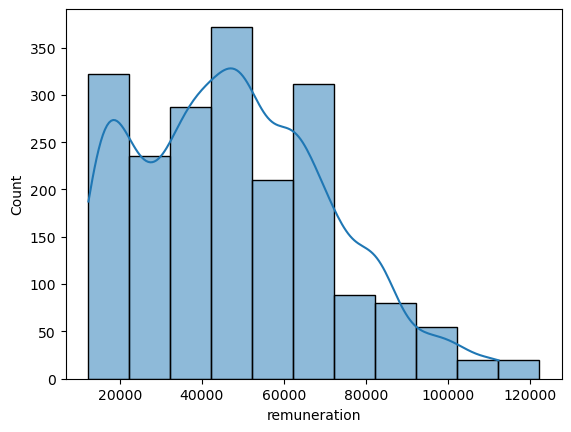

In [263]:
# Histogram of Remuneration
# check the distribution
sns.histplot(data=tr_subset, x="remuneration", kde=True, binwidth=10000)

### Set the dependent and independent variables and create the model

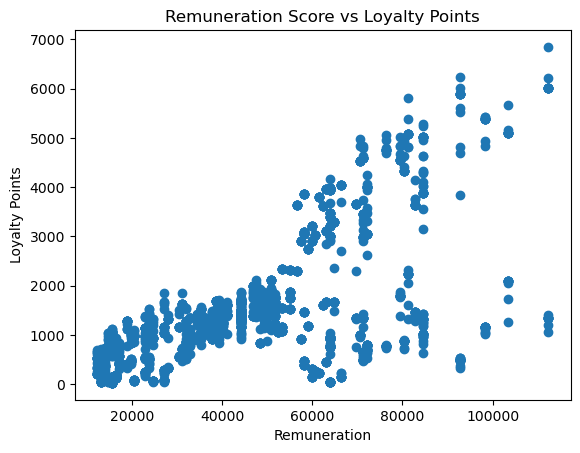

In [264]:
# Dependent variable
y = tr_subset["loyalty_points"]

# Independent variable
X = tr_subset["remuneration"]

# Check for linearity
plt.scatter(X,y)

# Set the title and legends for the graph.  
plt.title("Remuneration Score vs Loyalty Points")
plt.xlabel("Remuneration")
plt.ylabel("Loyalty Points") 

# show the scatterplot
plt.show()

In [265]:
# OLS model and summary
# Run the OLS test
f = 'y ~ X'
test = ols(f, data=tr_subset).fit()

# View the regression table
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Mon, 03 Jul 2023   Prob (F-statistic):          2.43e-209
Time:                        18:32:38   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
X              0.0342      0.001     34.960      0.000       0.032       0.036
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                     1.23e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> The summary indicates:
> - $R^2$: 38% of the total variability of `y` (how many loyalty_points the customer has collected), is explained by the variability of `X` (the customer remuneration).
> - `X`: The coefficient of `X` describes the slope of the regression line, in other words, how much the response variable `y` change when `X` changes by 1 pound (£). In this model, if the customer remuneration (`X`) changes by 1 pound (£), then the loyalty_points collected by the customer (`y`) will change by 0.0342 pounds (£). 
>  - The `P>[t]` for the `X` coefficient value tests the hypothesis that the slope is significant or not. If the corresponding probability is small (typically smaller than 0.05) the slope is significant. In this case, the probability of the t-value is zero, thus the estimated slope is significant. 
>   - The last two numbers describe the 95% confidence interval of the true `X` coefficient, i.e. the true slope. For instance, if you take a different sample, the estimated slope will be slightly different. If you take 100 random samples each of 500 observations of `X` and `y`, then 95 out of the 100 samples will derive a slope that is within the interval (0.032 , 0.036).

### Create the predicted y-values (loyalty_points) and plot the line of best fit

In [244]:
# Extract the estimated parameters
print("Parameters: ", test.params)

# Extract the standard errors
print("Standard errors: ", test.bse)  

# Extract the predicted values
print("Predicted values: ", test.predict())

Parameters:  Intercept   -65.686513
X             0.034188
dtype: float64
Standard errors:  Intercept    52.170717
X             0.000978
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [246]:
# Create the linear regression model
# x coef = 0.034188
# Constant coef = -65.686513
# Create the linear equation
y_pred =  (-65.686513) + 0.034188 * X # X = remuneration

# View the output
y_pred

0        354.825887
1        354.825887
2        382.860047
3        382.860047
4        410.894207
           ...     
1995    2821.831967
1996    3102.173567
1997    3102.173567
1998    3298.412687
1999    3102.173567
Name: remuneration, Length: 2000, dtype: float64

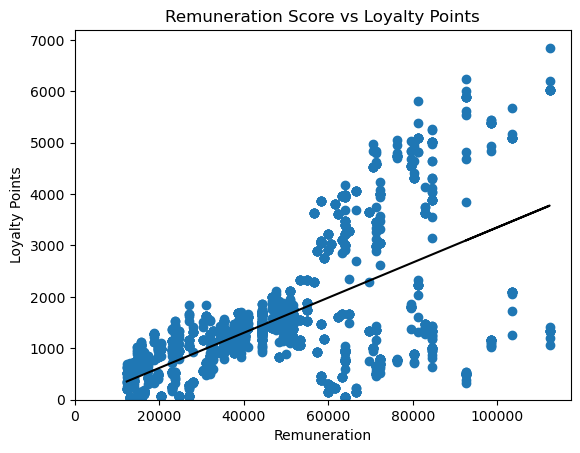

In [247]:
# Plot the data points with a scatterplot
plt.scatter(X, y)

# Plot the regression line (in black)
plt.plot(X, y_pred, color='black')

# Set the x and y limits on the axes
plt.xlim(0)
plt.ylim(0)

# Set the title and legends for the graph
plt.title("Remuneration Score vs Loyalty Points")
plt.xlabel("Remuneration")
plt.ylabel("Loyalty Points") 

# View the plot
plt.show()

### Check the Residuals

This shows how far the true value of y is from the predicted value of y.

In [249]:
# Residuals are calculated
# residuals = (y-predict - y-observe)
residuals = y_pred - y

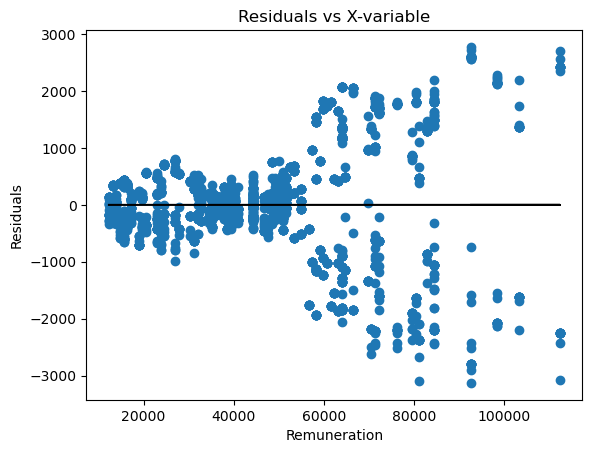

In [250]:
# Plot the residuals versus the x-values
# Ideally, there should be no pattern in this plot
plt.scatter(X, residuals)
plt.plot(X, y - y, color='black')
plt.title("Residuals vs X-variable")
plt.xlabel("Remuneration")
plt.ylabel("Residuals")
plt.show()

This shows that when the remuneration is greater than 55000, the predicted values for loyalty_points are further away from actual values of loyalty_points.

<b>Note:</b> We like the residuals to be close the 0 line i.e. the predicted value is not too far away from the actual value.

### As an experiment, remove customers with remuneration greater than 55000 & less than 2500 loyalty_points and run the OLS test

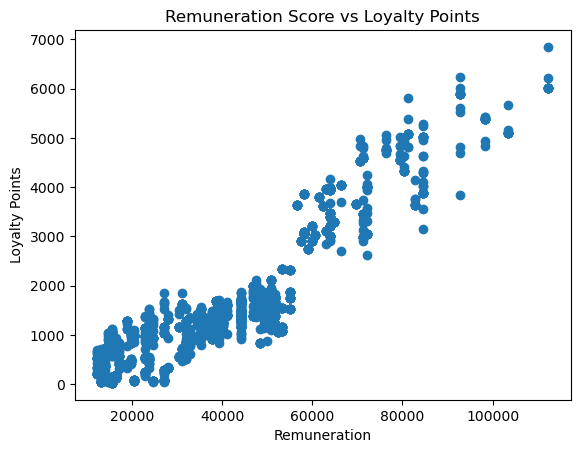

In [326]:
#tr_remuneration_lte55000 = tr_subset.loc[tr_subset['remuneration'] <= 55000]
tr_subset_remuneration = tr_subset.copy()
tr_drop = tr_subset_remuneration[(tr_subset_remuneration['remuneration'] >= 55000) \
                                 & (tr_subset_remuneration['loyalty_points'] <= 2500)].index

tr_subset_remuneration.drop(tr_drop, inplace=True)

# Check for linearity
plt.scatter(tr_subset_remuneration['remuneration'],tr_subset_remuneration['loyalty_points'])

# Set the title and legends for the graph.  
plt.title("Remuneration Score vs Loyalty Points")
plt.xlabel("Remuneration")
plt.ylabel("Loyalty Points") 

# show the scatterplot
plt.show()

In [327]:
tr_subset_remuneration.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1640 entries, 0 to 1997
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             1640 non-null   int64
 1   remuneration    1640 non-null   int64
 2   spending_score  1640 non-null   int64
 3   loyalty_points  1640 non-null   int64
dtypes: int64(4)
memory usage: 64.1 KB


In [328]:
# Dependent variable
y = tr_subset_remuneration["loyalty_points"]

# Independent variable
X = tr_subset_remuneration["remuneration"]

# OLS model and summary
# Run the OLS test
f = 'y ~ X'
test = ols(f, data=tr_subset_remuneration).fit()

# View the regression table
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     8289.
Date:                Mon, 03 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:00:16   Log-Likelihood:                -12677.
No. Observations:                1640   AIC:                         2.536e+04
Df Residuals:                    1638   BIC:                         2.537e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -808.0591     30.824    -26.215      0.000    -868.519    -747.600
X              0.0593      0.001     91.043      0.000       0.058       0.061
==============================================================================
Omnibus:                       26.630   Durbin-Watson:                   1.380
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.492
Skew:                           0.253   Prob(JB):                     4.80e-06
Kurtosis:                       2.681   Cond. No.                     1.07e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### (iii) Linear Regression: age vs loyalty_points

<Axes: xlabel='age', ylabel='Count'>

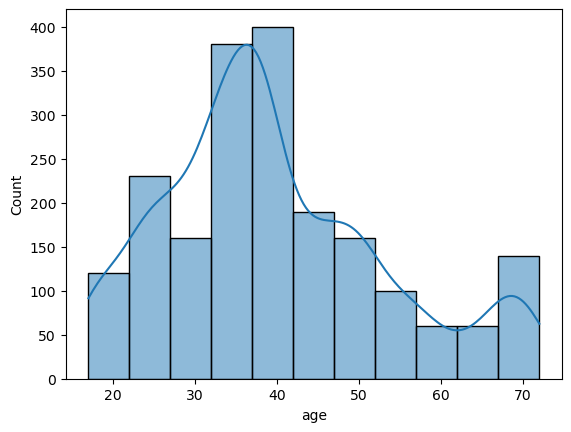

In [330]:
# Histogram of Age
# check the distribution
sns.histplot(data=tr_subset, x="age", kde=True, binwidth=5)

### Set the dependent and independent variables and create the model

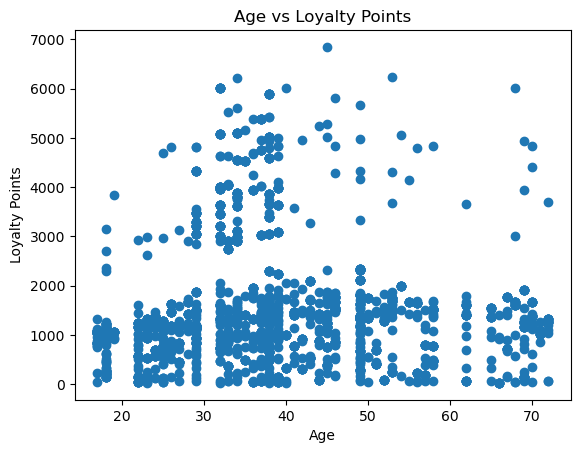

In [342]:
# Dependent variable
y = tr_subset["loyalty_points"]

# Independent variable
X = tr_subset["age"]

# Check for linearity
plt.scatter(X,y)

# Set the title and legends for the graph.  
plt.title("Age vs Loyalty Points")
plt.xlabel("Age")
plt.ylabel("Loyalty Points")

# show the scatterplot
plt.show()

In [343]:
# OLS model and summary

# Run the OLS test
f = 'y ~ X'
test = ols(f, data=tr_subset).fit()

# View the output
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Mon, 03 Jul 2023   Prob (F-statistic):             0.0577
Time:                        19:07:02   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
X             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> The summary indicates:
> - $R^2$: 0.1% of the total variability of `y` (how many loyalty_points the customer has collected), is explained by the variability of `X` (the customer age). There is no correlation.

### Create the predicted y-values (loyalty_points) and plot the line of best fit

In [344]:
# Extract the estimated parameters
print("Parameters: ", test.params)

# Extract the standard errors
print("Standard errors: ", test.bse)  

# Extract the predicted values
print("Predicted values: ", test.predict()) 

Parameters:  Intercept    1736.517739
X              -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
X             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [345]:
# Create the linear regression model
# x coef = -4.012805
# Constant coef = 1736.517739
# Create the linear equation
y_pred =  (1736.517739) + -4.012805 * X # X = age

# View the output
y_pred

0       1664.287249
1       1644.223224
2       1648.236029
3       1636.197614
4       1604.095174
           ...     
1995    1588.043954
1996    1563.967124
1997    1600.082369
1998    1600.082369
1999    1608.107979
Name: age, Length: 2000, dtype: float64

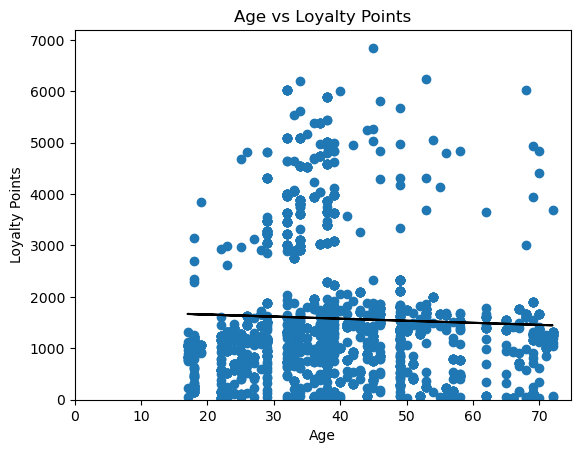

In [346]:
# Plot the data points with a scatterplot
plt.scatter(X, y)

# Plot the regression line (in black)
plt.plot(X, y_pred, color='black')

# Set the x and y limits on the axes
plt.xlim(0)
plt.ylim(0)

# Set the title and legends for the graph
plt.title("Age vs Loyalty Points")
plt.xlabel("Age")
plt.ylabel("Loyalty Points") 

# View the plot
plt.show()

Clearly no correlation between age and loyalty_points. This model is not useful in predicting the customer loyalty_points.

<table width="100%">
<thead>
    <tr style="background-color:#D6EEEE">
        <th style="width:85%"><h2 style="text-align:left">6. Making Predictions with Clustering</h2></th>
        <th><a id="6"></a><a class="anchor" href='#top'>Back to Top</a></th>
    </tr>
</thead>
</table>

We want better understand the usefulness of remuneration and spending_score in providing data for analysis. Firstly, we will create a scatterplot and check for any relationships between the two variables (remuneration and spending_score) and any other obvious problems with the data. Using k-means clustering to identify the optimal number of clusters and visualse the data based on these clusters. 

### Metadata Descriptions

A reminder of the metadata description for <b>remuneration</b> and <b>spending_score</b>:
- remuneration = Total income per customer per year in pounds, where k=1000.(I have multiplied by 1000 to give the correct value).
- spending_score = A score is assigned to the customer by Turtle Games based on the customer’s spending nature and behaviour. The value ranges between 1 and 100.

### Import Data

In [11]:
# import tr.csv dataset
tr = pd.read_csv('tr.csv')

In [12]:
# check the head
tr.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product_id,review,summary
0,Male,18,12300,39,210,Graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12300,81,524,Graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13120,6,40,Graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13120,77,562,Graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13940,40,366,Graduate,291,As my review of GF9's previous screens these w...,Money trap


In [13]:
# we are interested in relationships between remuneration and spending_score
# Drop unnecessary columns
tr_clustering = tr.drop(['gender', 'age', 'loyalty_points', 'education',
                          'product_id', 'review', 'summary'], axis=1)

In [14]:
# check the head
tr_clustering.head()

,remuneration,spending_score
0,12300,39
1,12300,81
2,13120,6
3,13120,77
4,13940,40


In [15]:
# desribe the dataframe
tr_clustering.describe()

,remuneration,spending_score
count,2000.00000,2000.000000
mean,48079.06000,50.000000
std,23123.98445,26.094702
min,12300.00000,1.000000
25%,30340.00000,32.000000
50%,47150.00000,50.000000
75%,63960.00000,73.000000
max,112340.00000,99.000000


### Visualise the Data: Boxplots

k-means is <b>sensitive to outliers</b>. We can check for outliers using boxplots.

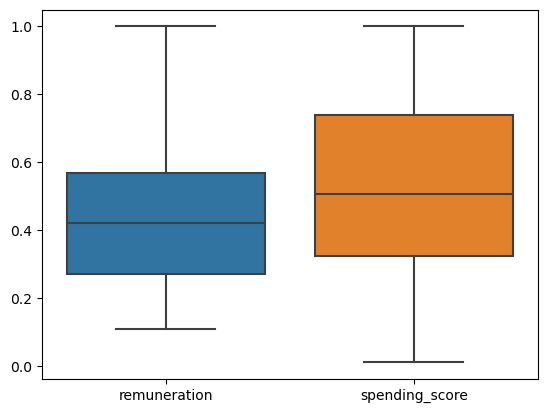

In [16]:
# visualise a boxplot for remuneration and spending_score and columns
sns.boxplot(max_abs_scaling(tr_clustering))

# show the plot
plt.show()

No outliers visible in the boxplots.

### Visualise the Data: Scatterplot

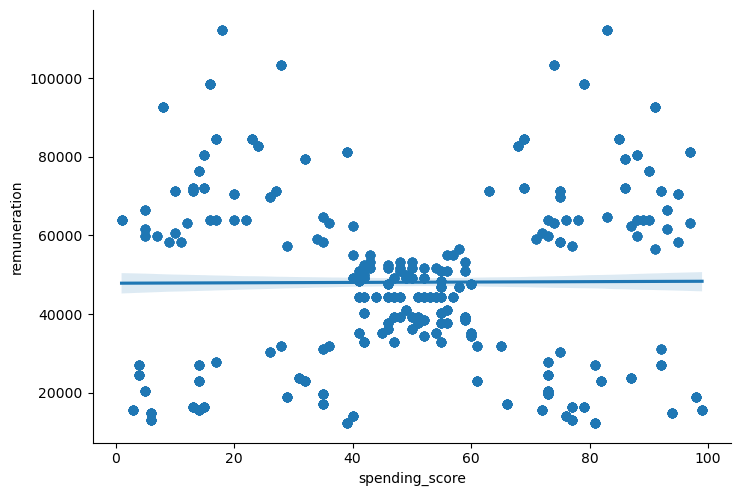

In [17]:
# visualise a pairplot with the remuneration and spending_score
sns.pairplot(tr_clustering, x_vars='spending_score', \
             y_vars='remuneration', height=5, aspect=1.5, kind='reg')

# show the plot
plt.show()

Possibly see 5 different clusters:
- Bottom left: low spending_score, low remuneration
- Bottom right: high spending_score, low remuneration
- Center: medium spending_score, medium remuneration
- Top left: low spending_score, high remuneration
- Top Right: high spending_score, high remuneration

In [18]:
# calculate correlations
tr_clustering.corr()

,remuneration,spending_score
remuneration,1.000000,0.005612
spending_score,0.005612,1.000000


No linear correlation between remuneration and spending_score.

### (i) Determine the Number of Clusters

### Standardise the Data Using StandardScaler

In [21]:
# setup constant to hold the standardised model data
scaler = StandardScaler()

# fit the model with the data in the tr_clustering dataframe
scaler.fit(tr_clustering)

# standardise the data in the model
tr_scaled_data = scaler.transform(tr_clustering)

In [24]:
# show the standardised data
tr_scaled_data

array([[-1.54765751, -0.42164693],
       [-1.54765751,  1.18827772],
       [-1.51218762, -1.68658773],
       ...,
       [ 1.92839126,  1.57159312],
       [ 2.17668045, -1.30327234],
       [ 1.92839126, -1.60992466]])

### Use The Elbow Method: KElbowVisualizer

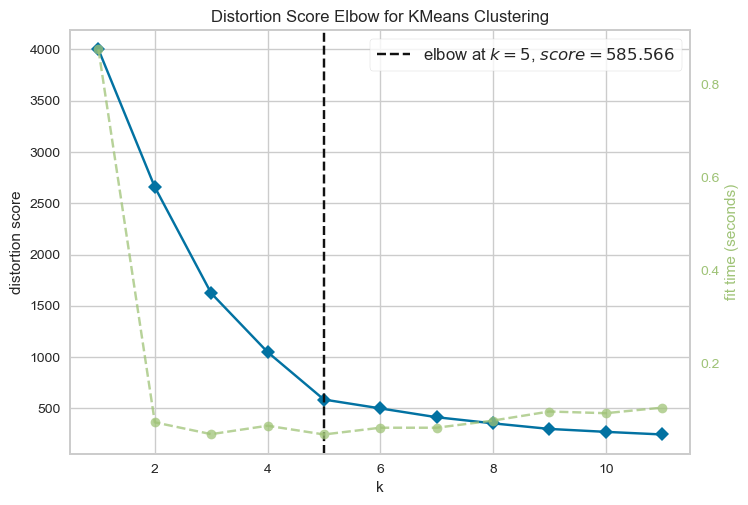

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
# Use KElbowVisualizer to calculate the Elbow
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(tr_scaled_data)

# show the elbow chart
visualizer.show()

KElbowVisualizer returns a recommended k value of 5.

### The Elbow Method: Classic Method

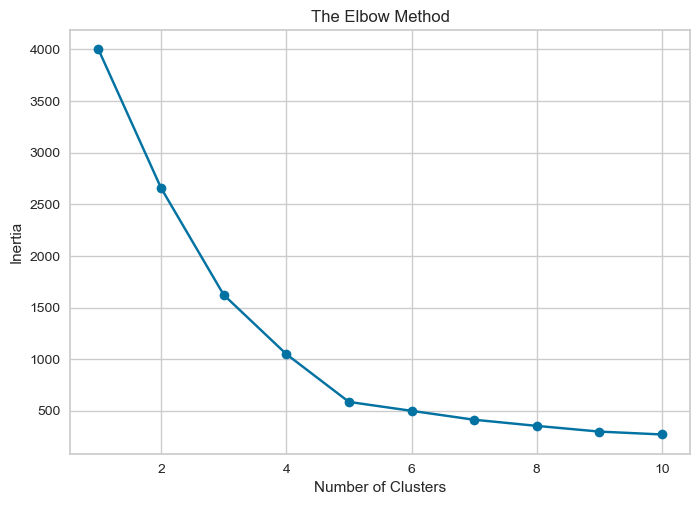

In [30]:
# Elbow chart for us to decide on the number of optimal clusters.
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(tr_scaled_data)
    ss.append(kmeans.inertia_)

# Plot the elbow method.
plt.plot(range(1, 11), ss, marker='o')

# Insert labels and title.
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")

# show the plot
plt.show()

The elbow line is exactly the same, we can estimate the optimal number of clusters will be 5 (we are interested in the number of clusters where the inertia value reduces sharply).

### The Silhouette Method

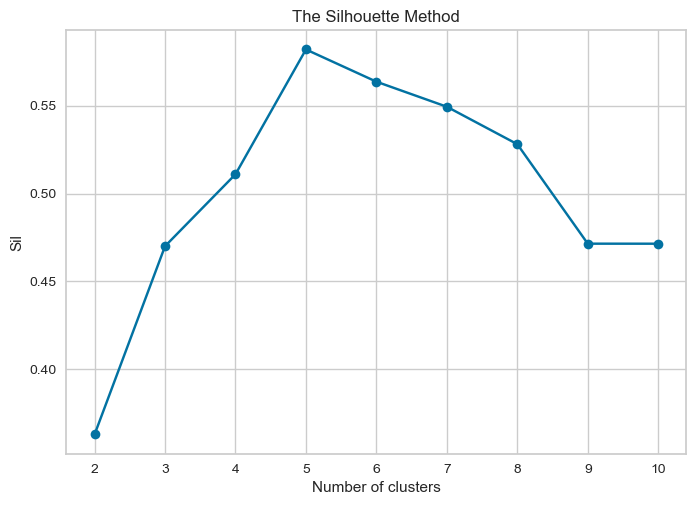

In [28]:
# Find the range of clusters to be used using silhouette method.
sil = []
k_max = 10

for k in range(2, k_max+1):
    kmeans_s = KMeans(n_clusters=k).fit(tr_scaled_data)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(tr_scaled_data, labels, metric='euclidean'))

# Plot the silhouette method.
plt.plot(range(2, k_max+1), sil, marker='o')

# Insert labels and title.
plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

# show the plot
plt.show()

We are interested in the number of clusters where the Sil value peaks, in this case the optimal number of clusters will be assumed to be 5. This is the same as the results from the elbow method which add confidence to the k value.

### (ii) Test for Different Number of Clusters (k)

### Function

In [59]:
def k_means_n(df, k_value):
    
    # Use k_value to fit the model
    kmeans = KMeans(n_clusters=k_value, max_iter=300, init='k-means++', random_state=42).fit(df)
    
    # Assign the kmeans.labels_ to the new cluster column in tr_clustering dataframe
    tr_clustering['cluster'] = kmeans.labels_
    
    # Plot the predicted clusters
    sns.scatterplot(data=tr_clustering, x='spending_score' , y ='remuneration', \
                    hue='cluster', s=120, palette='tab10')
    sns.rugplot(data=tr_clustering, x='spending_score', y='remuneration', hue='cluster', \
                palette='tab10', height=0.03)


### k = 4

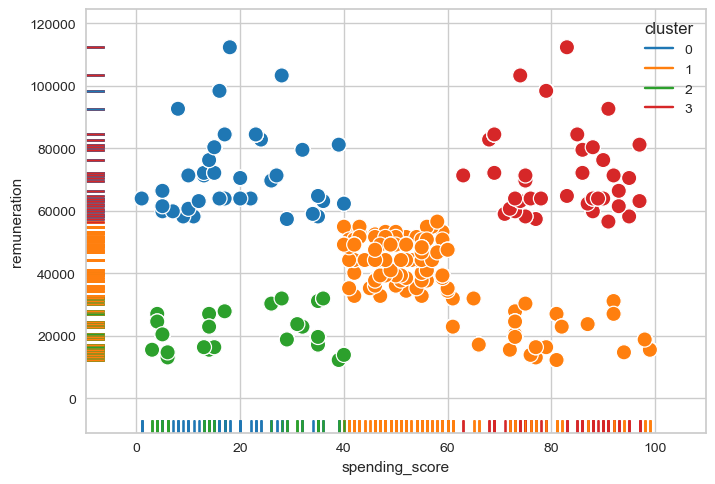

In [60]:
# 4 clusters (1 below optimal k value)
k_means_n(tr_scaled_data, 4)

The grouping for cluster 1 is spread over a large area, in comparison the other 3 clusters, which may not be ideal.

### k = 5

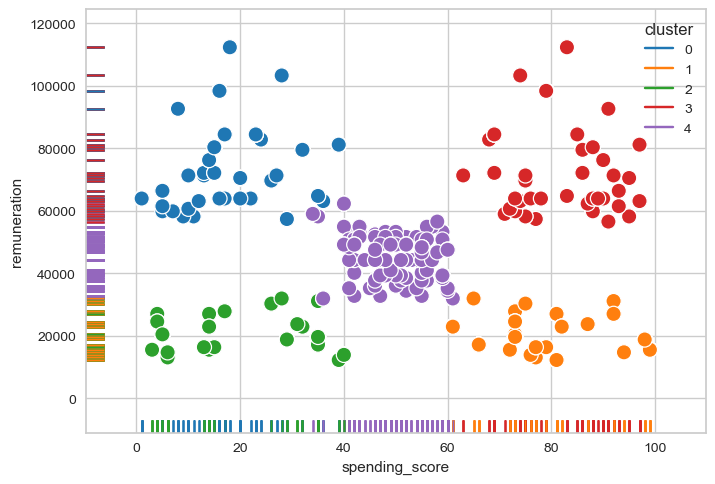

In [61]:
# 5 clusters (optimal k value)
k_means_n(tr_scaled_data, 5)

The clusters for k=5 appear to be more natural.

### k = 6

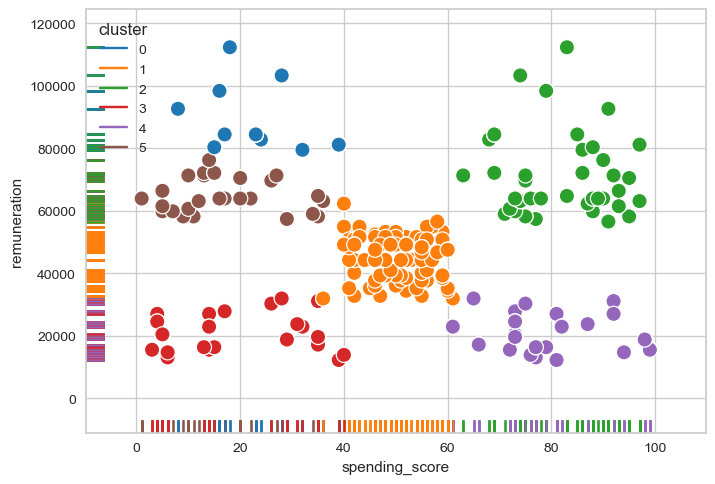

In [63]:
# 6 clusters (1 above optimal k value)
k_means_n(tr_scaled_data, 6)

It doesn't make sense to split the top left plots into cluster 5 and cluster 0.

### Conclusion

Based on the scatterplots above, k=5 appears to be the most natural fit for our model. There is more confidence in this decision because of the Elbow and Silhouette scores which are also k=5.

### (iii) Fit the Model for 5 Clusters (k=5)

In [202]:
# Use five clusters to fit the model
kmeans = KMeans(n_clusters=5, max_iter=300, init='k-means++', random_state=42).fit(tr_scaled_data)

# Assign the kmeans.labels_ to the new cluster column in tr_clustering dataframe
tr_clustering['cluster'] = kmeans.labels_

In [204]:
# check the head to see if the cluster column is added
tr_clustering.head()

,remuneration,spending_score,cluster
0,12300,39,2
1,12300,81,1
2,13120,6,2
3,13120,77,1
4,13940,40,2


In [66]:
# Check the number of observations per predicted class.
tr_clustering['cluster'].value_counts()

4    774
3    356
0    330
2    271
1    269
Name: cluster, dtype: int64

### Add the Clusters to the tr Dataframe

In [127]:
# create new column in tr dataframe to store the cluster values
tr['cluster'] = tr_clustering['cluster']

In [189]:
tr[['remuneration','spending_score','cluster']].head()

,remuneration,spending_score,cluster
0,12300,39,2
1,12300,81,1
2,13120,6,2
3,13120,77,1
4,13940,40,2


### Classify the Clusters

Possible classification for the 5 different clusters:
- Bottom left (cluster 2): low spending_score, low remuneration
- Bottom right (cluster 1): high spending_score, low remuneration
- Center (cluster 4): medium spending_score, medium remuneration
- Top left (cluster 0): low spending_score, high remuneration
- Top Right (cluster 3): high spending_score, high remuneration

In [130]:
# Dictionary mapping cluster value with classification
cluster_values = {0 : 'low spending_score, high remuneration',
                  1 : 'high spending_score, low remuneration',
                  2 : 'low spending_score, low remuneration',
                  3 : 'high spending_score, high remuneration',
                  4 : 'medium spending_score, medium remuneration'}

In [131]:
# Create new season column from dictionary mapping
tr['classification'] = tr['cluster'].map(cluster_values)

In [132]:
# reorder columns
cols = ['gender', 'age', 'remuneration', 'spending_score', 'cluster', 'classification', \
        'loyalty_points', 'education', 'product_id', 'review', 'summary']

tr = tr[cols]

In [134]:
# show the head
tr.head()

,gender,age,remuneration,spending_score,cluster,classification,loyalty_points,education,product_id,review,summary
0,Male,18,12300,39,2,"low spending_score, low remuneration",210,Graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12300,81,1,"high spending_score, low remuneration",524,Graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13120,6,2,"low spending_score, low remuneration",40,Graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13120,77,1,"high spending_score, low remuneration",562,Graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13940,40,2,"low spending_score, low remuneration",366,Graduate,291,As my review of GF9's previous screens these w...,Money trap


In [171]:
# show the value counts for each cluster classification
tr['classification'].value_counts()

medium spending_score, medium remuneration    774
high spending_score, high remuneration        356
low spending_score, high remuneration         330
low spending_score, low remuneration          271
high spending_score, low remuneration         269
Name: classification, dtype: int64

In [135]:
# export tr dataframe to ts.csv file
tr.to_csv('tr.csv', index=False)

### Visualisation: Countplot

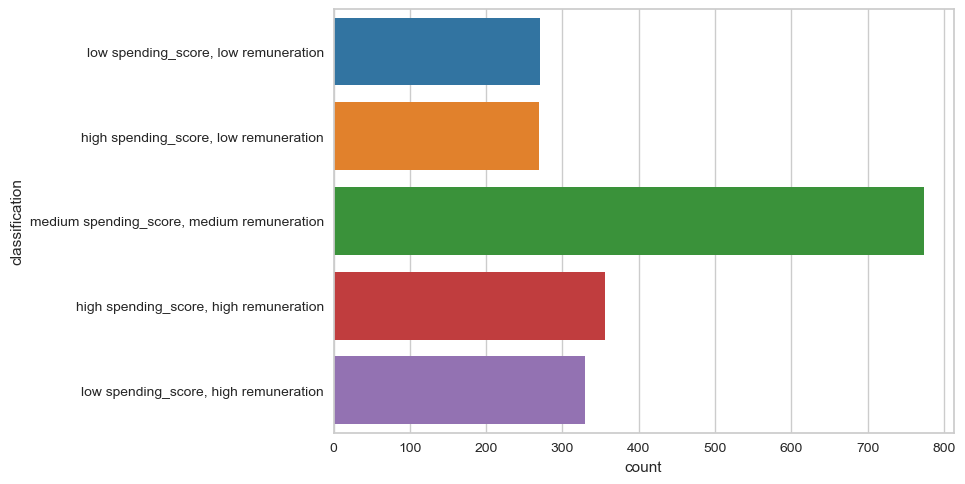

In [169]:
# Show a countplot of the predicted clusters
sns.countplot(y=tr['classification'], palette='tab10')

# Rotating X-axis labels
# plt.xticks(rotation = 90)

# show the chart
plt.show()

### Visualisation: Histograms

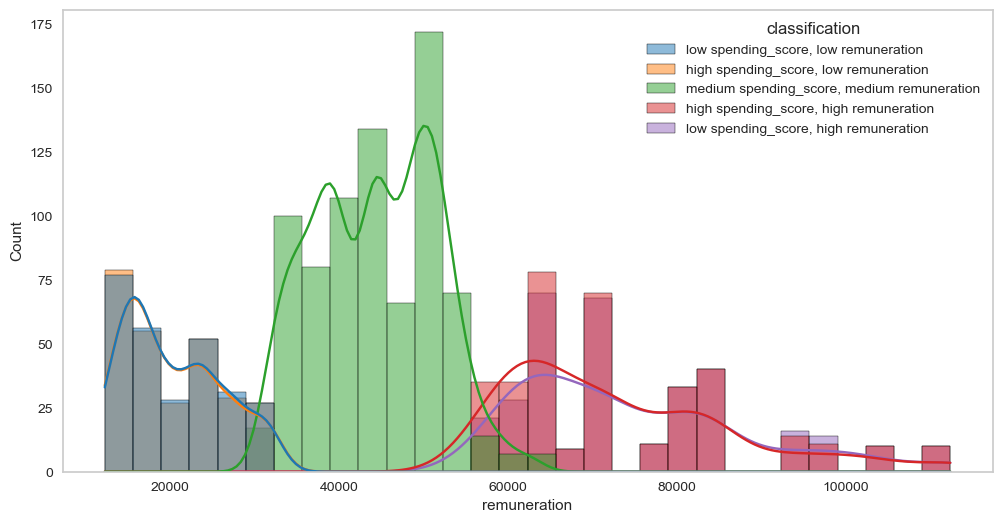

In [172]:
# Show a histogram for remuneration with the predicted clusters
plt.figure(figsize=(12,6))

sns.histplot(data=tr, x='remuneration', hue='classification', \
             palette='tab10', bins=30, kde=True)

plt.grid(False)
plt.show()

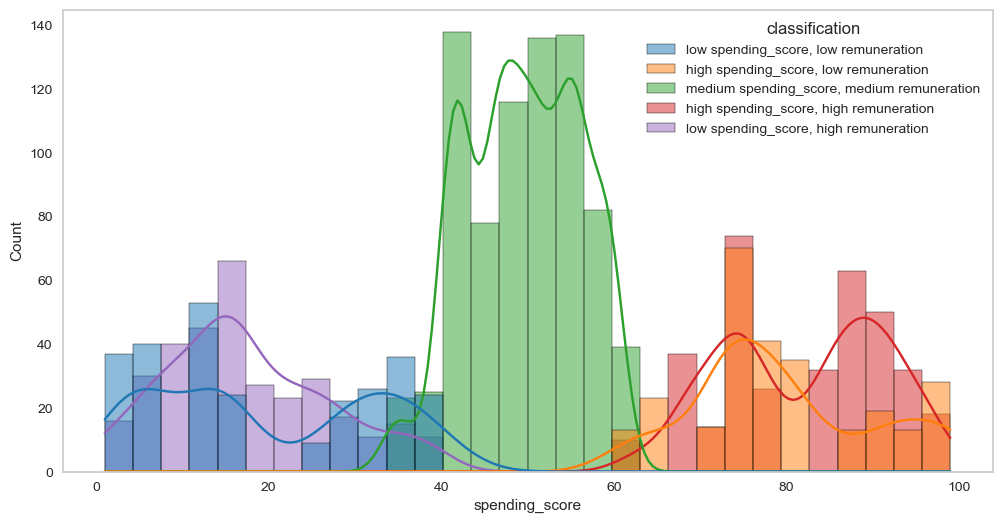

In [173]:
# Show a histogram for spending_score with the predicted clusters
plt.figure(figsize=(12,6))

sns.histplot(data=tr, x='spending_score', hue='classification', \
             palette='tab10', bins=30, kde=True)

plt.grid(False)

plt.show()

### Visualisation: Scatterplots

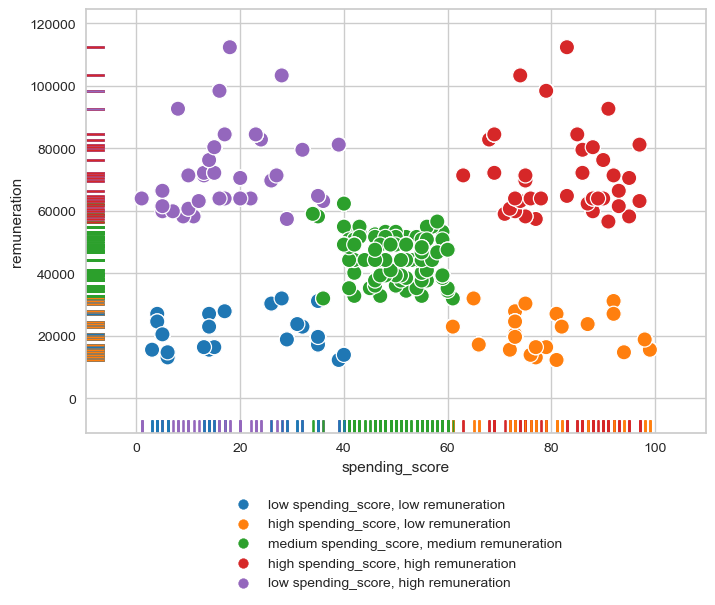

In [190]:
# create a scatterplot showing the relationship between spending_score and remuneration
# with the new classified clusters
sns.scatterplot(data=tr, x='spending_score' , y ='remuneration', \
                hue='classification', s=120, palette='tab10')

sns.rugplot(data=tr, x='spending_score', y='remuneration', hue='classification', \
            palette='tab10', height=0.03)

plt.legend(bbox_to_anchor =(0.5,-0.4), loc='lower center')

plt.show()

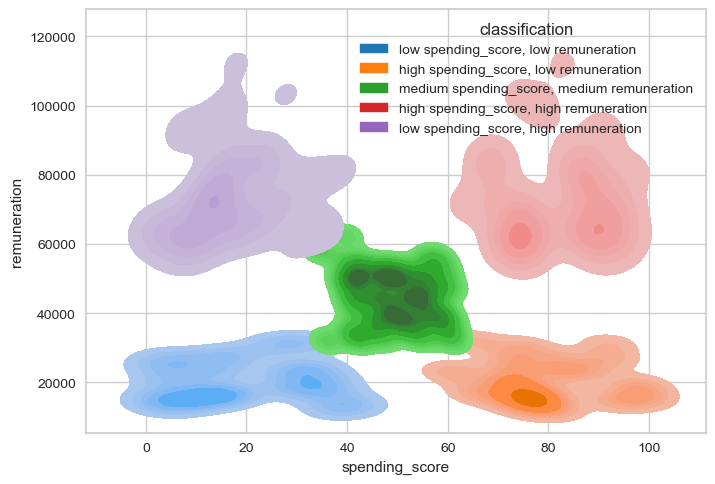

In [196]:
# create a kdeplot showing the density of values
sns.kdeplot(data=tr, x='spending_score', y='remuneration', hue='classification', \
            fill=True, palette='tab10')

plt.show()

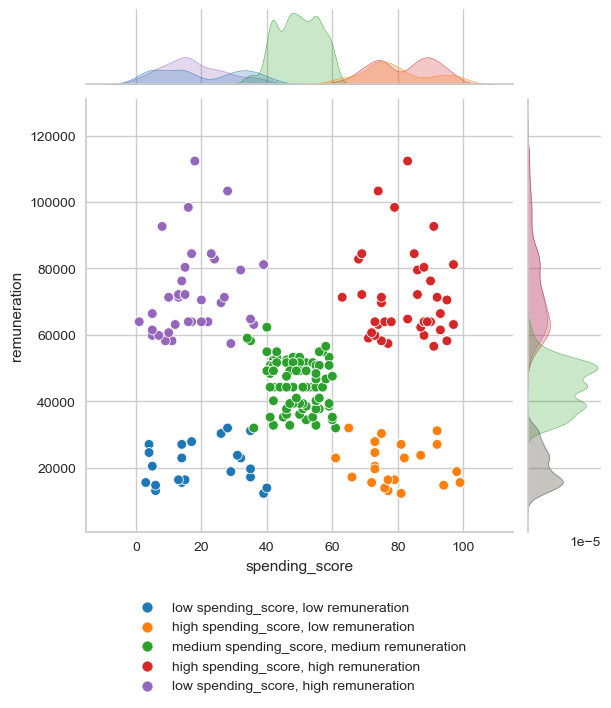

In [197]:
# create a jointplot to show the scatterplot and histograms combined
sns.jointplot(data=tr, x="spending_score", y="remuneration", \
              hue="classification", palette='tab10')

plt.legend(bbox_to_anchor =(0.5,-0.4), loc='lower center')

plt.show()

### (iv) Insights & Observations

<div class="alert alert-block alert-success">
    <b>Metadata reminder: </b> spending_score = A score is assigned to the customer by Turtle Games based on the customer’s spending nature and behaviour. The value ranges between 1 and 100.
</div>



It is assumed that a high spending_score = high spending in value of pounds (£). While it is acknowledged that spending in value of pounds will not be the only factor in generating the spending_score.

### Calculate the percentage of the total for each different group

In [226]:
# describe the dataset
tr.describe()

,age,remuneration,spending_score,cluster,loyalty_points,product_id
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48079.06000,50.000000,2.487500,1578.032000,4320.521500
std,13.573212,23123.98445,26.094702,1.511286,1283.239705,3148.938839
min,17.000000,12300.00000,1.000000,0.000000,25.000000,107.000000
25%,29.000000,30340.00000,32.000000,1.000000,772.000000,1589.250000
50%,38.000000,47150.00000,50.000000,3.000000,1276.000000,3624.000000
75%,49.000000,63960.00000,73.000000,4.000000,1751.250000,6654.000000
max,72.000000,112340.00000,99.000000,4.000000,6847.000000,11086.000000


In [224]:
group_classification = tr.groupby('classification') \
                       [['loyalty_points','age', 'spending_score', 'remuneration']].agg(['mean']) \
                       .reset_index()

group_classification

,classification,loyalty_points,age,spending_score,remuneration
,,mean,mean,mean,mean
0,"high spending_score, high remuneration",3988.238764,35.592697,82.008427,73240.280899
1,"high spending_score, low remuneration",971.944238,31.602230,79.416357,20353.680297
2,"low spending_score, high remuneration",911.760606,40.666667,17.424242,74831.212121
3,"low spending_score, low remuneration",275.059041,43.505535,19.763838,20424.354244
4,"medium spending_score, medium remuneration",1420.382429,42.129199,49.529716,44418.785530


In [212]:
# show the value counts for each cluster classification
tr_classification = tr['classification'].value_counts().reset_index()

# calculate percentage of total values for each classification
tr_classification['percentage'] = \
round((tr_classification['classification']/(tr_classification['classification'].sum())*100), 2)

tr_classification

,index,classification,percentage
0,"medium spending_score, medium remuneration",774,38.70
1,"high spending_score, high remuneration",356,17.80
2,"low spending_score, high remuneration",330,16.50
3,"low spending_score, low remuneration",271,13.55
4,"high spending_score, low remuneration",269,13.45


### Group Analysis

We identified 5 cluster groups of customers within the data relating to spending_score and remuneration which can help inform the marketing campaigns at Turtle Games:

<u><b>Group 1: low spending_score, low remuneration</b></u><br>
- This group is low risk (low value?), they spend relative to their monthly salary.
- This group represents 13.55% of the sample data.
- Average age is 43.5 years old (above average of the dataset which is 39.5). 
- The lowest number of loyalty points collected averaging only 275.

Targeting this group with a marketing campaign may have relatively low success in terms of new sales becuase this group would be risk adverse to spending beyond their means. 


<u><b>Group 2: high spending_score, low remuneration</b></u><br>
- This group is high risk and spend beyond their relative means.
- This group represents 13.45% of the total in this sample data.
- Average age is 31.6 years old which is the youngest grouping.
- Loyalty points collected averages 971 (3rd highest).

This group may purchase impulsively, even though the low yearly income suggests purchases will be less affordable. The lower average age indicates that perhaps some of the customers in this group are living at the parent's home. Despite the low remuneration, this group should be targeted for marketing purposes.The high spending_score coupled with the low loyalty_points suggests that this group may be interested in promotions or bargain buys (many purchases at low prices).


<u><b>Group 3: medium spending_score, medium remuneration</b></u><br>
- This group does not take on any extra risk and tends to spend as anticipated according to the yearly income.
- This group is the largest cluster and represents 38.70% of the total in this sample data.
- Average age is 42 years old which is the above the dataset average.
- Loyalty points collected are quite high at 1,420 (2nd highest).

This largest group is the 'bread-and-butter' of the business and should never be ignored. Average age suggests that they may be long-term loyal customers.


<u><b><b>Group 4: low spending_score, high remuneration</b></u><br>
- This group has lower interest in the products on sale, which can easily be purchased based on the yearly salary.
- This group represents 16.50% of the total in this sample data.
- Average age is 40.66 years old which is the above the dataset average.
- Loyalty points collected are not impressive at 911 (2rd lowest).

Despite being able to afford to purchase, customers in this group show little interest in the products. It may be less cost-effective to target this group with the marketing budget.
    

<u><b>Group 5: high spending_score, high remuneration</b></u><br>
- This group has a great deal of interest in the products on sale, and they can easily afford to purchase more based on the yearly salary.
- This group represents 17.80% of the total in this sample data (2nd largest group).
- Average age is 35.60 years old which is the below the dataset average (2nd youngest group).
- Loyalty points collected are the most impressive at 3,988 (top).
    
This group has the most disposable income and doesn't mind spending it, possibly purchasing some of the most expensive products. The marketing department should always include this group in any new campaign.

### Take a look at how the new group classification fits the regression models

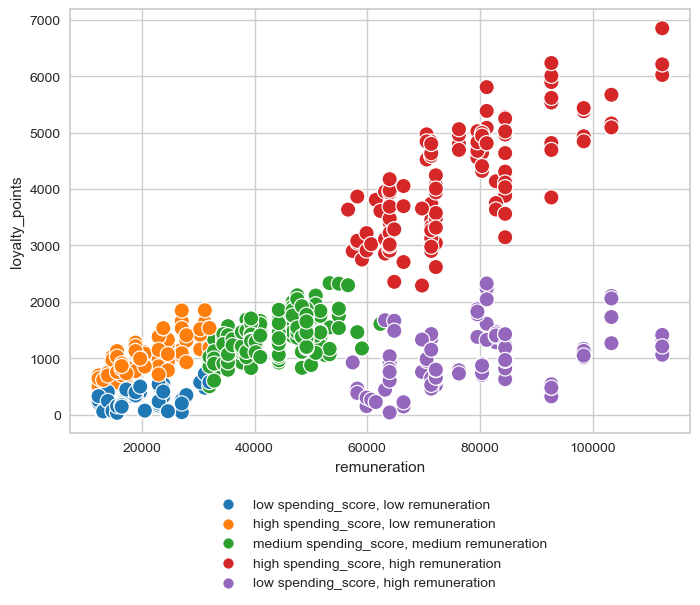

In [233]:
# visualise the relationship between loyalty_points and remuneration
# showing the group classification model
sns.scatterplot(data=tr, x='remuneration' , y ='loyalty_points', \
                hue='classification', s=120, palette='tab10')

plt.legend(bbox_to_anchor =(0.5,-0.4), loc='lower center')

plt.show()

Remember, the linear regression model for loyalty_points and remuneration shows a strong positive correlation. By including the new classification model, it adds value to the data. It confirms previous expectations that by removing data points with remuneration above 60,000 and loyalty_points below 2500 (low spending_score, high remuneration), the  predictive power of our regression model will be much improved.

The groups appear to be heterogenous, clearly delineated.

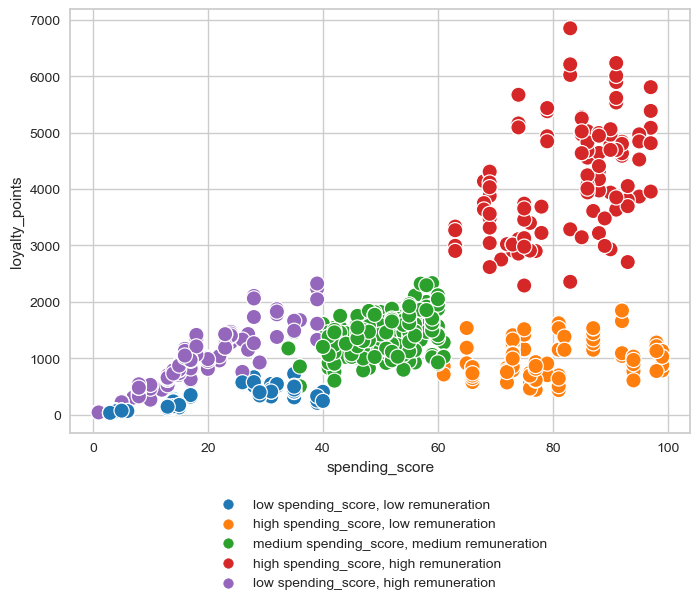

In [234]:
# visualise the relationship between loyalty_points and spending_score
# showing the group classification model
sns.scatterplot(data=tr, x='spending_score' , y ='loyalty_points', \
                hue='classification', s=120, palette='tab10')

plt.legend(bbox_to_anchor =(0.5,-0.4), loc='lower center')

plt.show()

A clear positive correlation between spending_score and loyalty_points was already identified. The anomaly appears to be the 'high spending_score, low remuneration' (orange) group, perhaps this can be explained as group being interested in promotions or bargain buys (many purchases at low prices) which do little to add to the customer loyalty_points total.

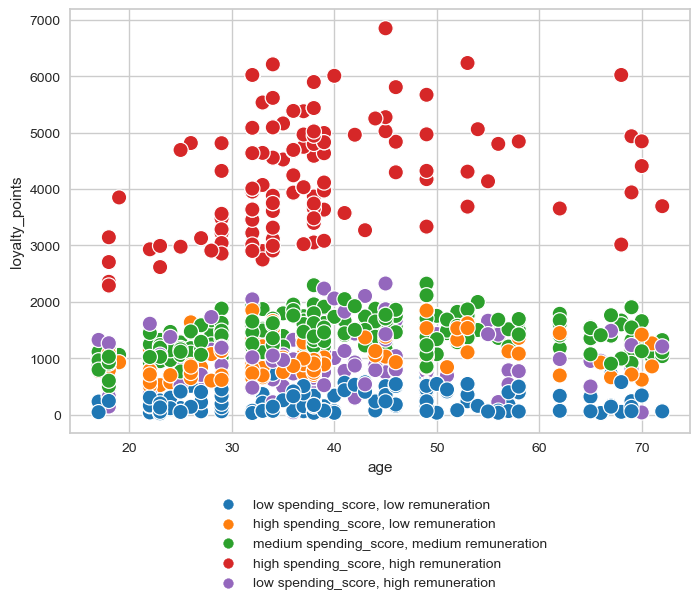

In [231]:
# visualise the relationship between loyalty_points and remuneration
# showing the group classification model
sns.scatterplot(data=tr, x='age' , y ='loyalty_points', \
                hue='classification', s=120, palette='tab10')

plt.legend(bbox_to_anchor =(0.5,-0.4), loc='lower center')

plt.show()

Previously, this visualisation offered little value, but by including the new group classification there appears to be 'layers' which illustrates that despite age, loyalty points appear to be accumulated based on higher yearly income. The anomaly in this chart is that the group 'low spending_score, high remuneration' appears to be mixed up randomly within the other 3 groups with loyalty points below 2000. There is a clear and obvious distinction between the 'high spending_score, high remuneration' group and the other 4 groups.

<table width="100%">
<thead>
    <tr style="background-color:#D6EEEE">
        <th style="width:85%"><h2 style="text-align:left">7. Analysing Customer Sentiments with Reviews</h2></th>
        <th><a id="7"></a><a class="anchor" href='#top'>Back to Top</a></th>
    </tr>
</thead>
</table>